In [5]:
import pandas as pd

In [6]:
amazon = pd.read_csv("amazon.csv")

In [7]:
amazon

,Name,Author,User Rating,Reviews,Price,Price_r,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,$8.00,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,$22.00,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,$15.00,15,2018,Non Fiction
3,1984,George Orwell,4.7,70425,$7.48,8,2021,Fiction
4,1984 (Signet Classics),George Orwell,4.7,21424,$6.00,6,2017,Fiction
...,...,...,...,...,...,...,...,...
645,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,$8.00,8,2019,Fiction
646,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,$8.00,8,2016,Non Fiction
647,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,$8.00,8,2017,Non Fiction
648,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,$8.00,8,2018,Non Fiction


## Preguntas

Por año cuantos libros ha publicado un autor, recuerde que los años no trabajados deberia de aparecer en cero. considere como primer registro por autor el primer año en que publico y el ultimo el año maximo encontrado.

Ejemplo, si Uayeb public en 2009 dos libros, y en 2011 tres. y esas son las dos unicas entradas para este autor. la salida para el deberia de ser:

In [8]:
pd.DataFrame({ "Autor" : ["Uayeb","Uayeb","Uayeb"] , "Year" : [2009,2010,2011]  , "Conteo" : [2,0,3] })

,Autor,Year,Conteo
0,Uayeb,2009,2
1,Uayeb,2010,0
2,Uayeb,2011,3


In [ ]:
#Solucion

#Hacer un conteo de Author agrupandolos al igual que los Year
#Ordenar los años con sort_values y ascending

In [125]:
amazon["Autor"] = amazon["Author"]

In [139]:
e1 = amazon.groupby(["Author", "Year", "Autor"] , as_index = False).agg({ 'Autor' : ['count'] })

In [141]:
e1.columns = e1.columns.droplevel(1)

In [142]:
e1.columns = ["Author", "Year", "Conteo"]

In [143]:
e1 = e1.sort_values(["Author", "Year"], ascending=True)

In [144]:
e1

,Author,Year,Conteo
0,Abraham Verghese,2010,1
1,Abraham Verghese,2011,1
2,Adam Gasiewski,2017,1
3,Adam Mansbach,2011,1
4,Adam Silvera,2021,1
...,...,...,...
584,Wonder House Books,2021,1
585,Workman Publishing,2020,2
586,Workman Publishing,2021,1
587,Zhi Gang Sha,2009,1


In [ ]:
# Falta los años no trabajados deberia de aparecer en cero

Que Autores han trabado en un año en mas de un libro

Ejemplo de salida esperada:

In [23]:
pd.DataFrame({
    
    "Autor" : ['Uayeb','Imix']
    , "Year" : [2010, 2010]
    , "Conteo de Titulos" : [2 , 3]
    
})

,Autor,Year,Conteo de Titulos
0,Uayeb,2010,2
1,Imix,2010,3


In [ ]:
#Solucion

#Buscar los autores que tengan como "conteo" mas de 1
#Volver a ordenar por autor y año

In [145]:
e2 = e1.copy()

In [149]:
e2 = e2.loc[ e2["Conteo"] > 1 , :]

In [151]:
e2 = e2.sort_values(["Author", "Year"], ascending=True)

In [152]:
e2

,Author,Year,Conteo
5,Adam Wallace,2020,2
16,Amanda Gorman,2021,2
58,Bill Martin Jr.,2020,2
61,Bill O'Reilly,2012,2
67,Blue Star Coloring,2015,2
85,Charlaine Harris,2009,2
128,Dav Pilkey,2018,3
129,Dav Pilkey,2019,3
140,David Zinczenko,2009,2
163,Dr. Seuss,2015,2


Que genero por año ha obtenido el mejor rating en promedio. (solo deberia de obtener un registro por año)

- ejemplo de la salida esperada:

In [22]:
pd.DataFrame({
    "Year" : [2009,2010]
    , "Genre" : [ "Fiction" , "Fiction" ]
    , "Mean User Rating": [ 4.59 , 4.61 ]
})

,Year,Genre,Mean User Rating
0,2009,Fiction,4.59
1,2010,Fiction,4.61


In [ ]:
#Solucion

#Crear nuevo df con info de Year, Genre y User Rating
#Agrupar por Year
#Generar el promedio de User Rating
#Ordenar y usar cumcount
#Sacar los promedios mayores

In [189]:
amazon.sort_values(["Year", "Genre"], ascending=True)

,Name,Author,User Rating,Reviews,Price,Price_r,Year,Genre,Conteo,Autor
47,"Breaking Dawn (The Twilight Saga, Book 4)",Stephenie Meyer,4.6,9769,$13.00,13,2009,Fiction,0,Stephenie Meyer
78,Dead And Gone: A Sookie Stackhouse Novel (Sook...,Charlaine Harris,4.6,1541,$4.00,4,2009,Fiction,0,Charlaine Harris
90,Diary of a Wimpy Kid: The Last Straw (Book 3),Jeff Kinney,4.8,3837,$15.00,15,2009,Fiction,0,Jeff Kinney
98,"Dog Days (Diary of a Wimpy Kid, Book 4) (Volum...",Jeff Kinney,4.8,3181,$12.00,12,2009,Fiction,1,Jeff Kinney
116,Eclipse (Twilight Sagas),Stephenie Meyer,4.7,5505,$7.00,7,2009,Fiction,1,Stephenie Meyer
...,...,...,...,...,...,...,...,...,...,...
546,The Song of Achilles: A Novel,Madeline Miller,4.7,51448,$10.34,11,2021,Non Fiction,0,Madeline Miller
548,The Storyteller: Tales of Life and Music,Dave Grohl,4.8,25554,$17.99,18,2021,Non Fiction,0,Dave Grohl
552,The Subtle Art of Not Giving a F*ck: A Counter...,Mark Manson,4.6,77899,$14.80,15,2021,Non Fiction,0,Mark Manson
571,The Very Hungry Caterpillar,Eric Carle,4.9,52375,$5.06,6,2021,Non Fiction,0,Eric Carle


In [354]:
temp = amazon.loc[ : , ["Year", "Genre", "User Rating"]]

In [356]:
temp = temp.groupby(["Year", "Genre"] , as_index = False).agg({ 'User Rating' : ['mean'] })

In [406]:
temp.columns = temp.columns.droplevel(1)

In [408]:
temp.columns = ["Year", "Genre", "Mean User Rating"]

In [409]:
temp = temp.sort_values(["Year", "Mean User Rating"], ascending=True)

In [410]:
temp["Max"] = temp.groupby(["Year"] , as_index = False).cumcount()

In [411]:
temp

,Year,Genre,Mean User Rating,Max
1,2009,Non Fiction,4.576923,0
0,2009,Fiction,4.591667,1
3,2010,Non Fiction,4.520000,0
2,2010,Fiction,4.615000,1
5,2011,Non Fiction,4.513793,0
4,2011,Fiction,4.619048,1
6,2012,Fiction,4.495238,0
7,2012,Non Fiction,4.558621,1
8,2013,Fiction,4.545833,0
9,2013,Non Fiction,4.561538,1


In [412]:
e3 = temp.loc[ temp["Max"] == 1 , :]

In [413]:
e3

,Year,Genre,Mean User Rating,Max
0,2009,Fiction,4.591667,1
2,2010,Fiction,4.615000,1
4,2011,Fiction,4.619048,1
7,2012,Non Fiction,4.558621,1
9,2013,Non Fiction,4.561538,1
10,2014,Fiction,4.631034,1
12,2015,Fiction,4.652941,1
14,2016,Fiction,4.715789,1
16,2017,Fiction,4.737500,1
18,2018,Fiction,4.738095,1


Cuales son los autores que por lo menos dos años consecutivos hayan tenido en promedio ratings que decrecen 

Ejemplo

- Si Uayeb caballero, en 2010 saco dos libros, y el rating de esos dos libros es de 3.1, ese mismo autor en 2011 en su unico libro publicado ese año su promedio fue de 2.9 y en 2012 sus tres libros publicados en promedio su rating es de 2.8. Podemos ver que son dos años que este usuario ha ido decreciendo 

No importa que haya publicado en años salteados, ejemplo, 2010 si, 2011 no, 2012 no, 2013 si, 2014 si. para este caso el analisis comienza en 2010, 2013 y 2014

Ejemplo de salida esperada:

In [24]:
pd.DataFrame({ "autores" : ['Uayeb','Imix'] })

,autores
0,Uayeb
1,Imix


In [ ]:
#Solucion

#Crear nuevo df con info de Year, Author y User Rating
#Agrupar por Year y Author
#Generar el promedio de User Rating
#Generar la condicion de que por lo menos en 2 años consecutivos su rating decrece

In [385]:
temp2 = amazon.loc[ : , ["Year", "Author", "Genre", "User Rating"]]

In [386]:
temp2 = temp2.groupby(["Year", "Genre", "Author"] , as_index = False).agg({ 'User Rating' : ['mean'] })

In [388]:
temp2.columns = temp2.columns.droplevel(1)

In [390]:
temp2.columns = ["Year", "Genre", "Author", "Mean User Rating"]

In [391]:
temp2 = temp2.sort_values(["Author", "Genre", "Year", "Mean User Rating"], ascending=True)

In [402]:
temp2["Con"] = temp2.groupby(["Genre", "Author", "Mean User Rating"] , as_index = False).cumcount()

In [403]:
temp2

,Year,Genre,Author,Mean User Rating,Con
39,2010,Fiction,Abraham Verghese,4.6,0
82,2011,Fiction,Abraham Verghese,4.6,1
375,2017,Non Fiction,Adam Gasiewski,4.4,0
83,2011,Fiction,Adam Mansbach,4.8,0
540,2021,Fiction,Adam Silvera,4.6,0
...,...,...,...,...,...
561,2021,Fiction,Wonder House Books,4.6,0
512,2020,Fiction,Workman Publishing,4.8,0
562,2021,Fiction,Workman Publishing,4.8,1
38,2009,Non Fiction,Zhi Gang Sha,4.6,0


In [404]:
e4 = temp2.loc[ temp2["Con"] > 2 , :]

In [405]:
e4

,Year,Genre,Author,Mean User Rating,Con
141,2012,Non Fiction,American Psychological Association,4.5,3
193,2013,Non Fiction,American Psychological Association,4.5,4
242,2014,Non Fiction,American Psychological Association,4.5,5
275,2015,Non Fiction,American Psychological Association,4.5,6
321,2016,Non Fiction,American Psychological Association,4.5,7
...,...,...,...,...,...
345,2016,Non Fiction,Sarah Young,4.9,5
211,2013,Non Fiction,Stephen R. Covey,4.6,3
213,2013,Non Fiction,The College Board,4.4,3
257,2014,Non Fiction,The College Board,4.4,4


In [414]:
e4 = e4.loc[ : , ["Author"]].drop_duplicates()

In [415]:
e4

,Author
141,American Psychological Association
545,Bill Martin Jr.
378,Dale Carnegie
504,Dav Pilkey
380,Don Miguel Ruiz
304,Dr. Seuss
454,Emily Winfield Martin
306,Eric Carle
150,Gallup
202,Gary Chapman


Cuales son los libros que por año se encuentran arriba del percentil 70. (Sin importar genero)

Ejemplo de salida esperada

In [26]:
pd.DataFrame({
    "Year": [2010,2010,2011,2011]
    , "Titulos": ["Libro A","Libro B","Libro Z","Libro Y"]
    , "Autor": ["Autor 1","Autor 2","Autor 1","Autor 3"]
    , "Rating": [4.1, 4.0,4.2,4.3]
    , "Rating .70": [3.8,3.8,3.7,3.7]
})

,Year,Titulos,Autor,Rating,Rating .70
0,2010,Libro A,Autor 1,4.1,3.8
1,2010,Libro B,Autor 2,4.0,3.8
2,2011,Libro Z,Autor 1,4.2,3.7
3,2011,Libro Y,Autor 3,4.3,3.7


Este ejemplo es para que se haga una idea de la estructura de salida esperada, claramente por año dependiendo de las publicaciones pueden haber varios libros arriba del percentil 70


In [ ]:
#Solucion

#Crear nuevo df con info de Year, Name, Author, User Rating
#En una variable almacenar el valor de los Rating y con esta info crear un df que obtenga el percentil 70
#Realizar la condicion de que el User Rating sea mayor al percentil 70

In [421]:
temp3 = amazon.loc[ : , ["Year", "Name", "Author", "User Rating"]]

In [422]:
temp3 = temp3.sort_values(["Year", "Name", "Author", "User Rating"], ascending=True)

In [423]:
temp3

,Year,Name,Author,User Rating
16,2009,"Act Like a Lady, Think Like a Man: What Men Re...",Steve Harvey,4.6
29,2009,Arguing with Idiots: How to Stop Small Minds a...,Glenn Beck,4.6
47,2009,"Breaking Dawn (The Twilight Saga, Book 4)",Stephenie Meyer,4.6
67,2009,Crazy Love: Overwhelmed by a Relentless God,Francis Chan,4.7
78,2009,Dead And Gone: A Sookie Stackhouse Novel (Sook...,Charlaine Harris,4.6
...,...,...,...,...
571,2021,The Very Hungry Caterpillar,Eric Carle,4.9
579,2021,The Wonderful Things You Will BeThe Wonderful ...,Emily Winfield Martin,4.9
584,2021,They Both Die at the End,Adam Silvera,4.6
618,2021,Untamed,Glennon Doyle,4.6


In [424]:
import numpy as np

<AxesSubplot:>

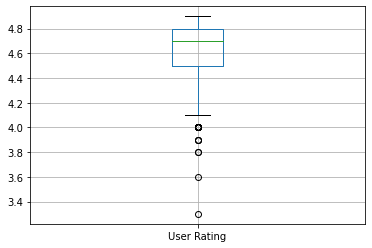

In [425]:
temp3.loc[ : , ["User Rating"]].boxplot()

In [426]:
temp3["Rating .70"] = np.quantile(temp3["User Rating"] , 0.70)

In [427]:
e5 = temp3

In [428]:
e5

,Year,Name,Author,User Rating,Rating .70
16,2009,"Act Like a Lady, Think Like a Man: What Men Re...",Steve Harvey,4.6,4.8
29,2009,Arguing with Idiots: How to Stop Small Minds a...,Glenn Beck,4.6,4.8
47,2009,"Breaking Dawn (The Twilight Saga, Book 4)",Stephenie Meyer,4.6,4.8
67,2009,Crazy Love: Overwhelmed by a Relentless God,Francis Chan,4.7,4.8
78,2009,Dead And Gone: A Sookie Stackhouse Novel (Sook...,Charlaine Harris,4.6,4.8
...,...,...,...,...,...
571,2021,The Very Hungry Caterpillar,Eric Carle,4.9,4.8
579,2021,The Wonderful Things You Will BeThe Wonderful ...,Emily Winfield Martin,4.9,4.8
584,2021,They Both Die at the End,Adam Silvera,4.6,4.8
618,2021,Untamed,Glennon Doyle,4.6,4.8


In [429]:
e5.loc[ e5["User Rating"] > e5["Rating .70"] , :]

,Year,Name,Author,User Rating,Rating .70
228,2011,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,4.8
171,2012,"Goodnight, Goodnight Construction Site (Hardco...",Sherri Duskey Rinker,4.9,4.8
229,2012,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,4.8
294,2012,"Oh, the Places You'll Go!",Dr. Seuss,4.9,4.8
172,2013,"Goodnight, Goodnight Construction Site (Hardco...",Sherri Duskey Rinker,4.9,4.8
...,...,...,...,...,...
214,2021,I Love You to the Moon and Back,Amelia Hepworth,4.9,4.8
302,2021,"Oh, the Places You'll Go!",Dr. Seuss,4.9,4.8
481,2021,The Hill We Climb: An Inaugural Poem for the C...,Amanda Gorman,4.9,4.8
571,2021,The Very Hungry Caterpillar,Eric Carle,4.9,4.8


In [ ]:
#No supe hacer el percentil por cada año